About the data:
This is a sales transaction data set of UK-based e-commerce (online retail) for one year. This London-based shop has been selling gifts and homewares for adults and children through the website since 2007. Their customers come from all over the world and usually make direct purchases for themselves. There are also small businesses that buy in bulk and sell to other customers through retail outlet channels.

The data set contains 500K rows and 8 columns. The following is the description of each column.

1) TransactionNo (categorical): a six-digit unique number that defines each transaction. (The letter “C” in the code indicates a cancellation).

2) Date (numeric): the date when each transaction was generated.

3) ProductNo (categorical): a five or six-digit unique character used to identify a specific product.

4) Product (categorical): product/item name.

5) Price (numeric): the price of each product per unit in pound sterling (£).

6) Quantity (numeric): the quantity of each product per transaction. (Negative values indicate cancelled transactions).

7) CustomerNo (categorical): a five-digit unique number that defines each customer.

8) Country (categorical): name of the country where the customer resides.

There is a small percentage of order cancellation in the data set. Most of these cancellations were due to out-of-stock conditions on some products. Under this situation, customers tend to cancel an order as they want all products delivered all at once.

# import python modules

In [208]:
import numpy as np

In [209]:
import pandas as pd


# Read file ( 'Sales Transaction v.4a.csv' )

In [210]:
df = pd.read_csv('Sales Transaction v.4a.csv')

In [212]:
df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [213]:
df = df.rename(columns={'CustomerNo': 'Cust_no', 'ProductNo': 'Pro_no','ProductName': 'Pro_n','TransactionNo':'Trans_no'})

In [214]:
df

,Trans_no,Date,Pro_no,Pro_n,Price,Quantity,Cust_no,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


# Exploratory data analysis ( EDA )
## Part 1
### cleaning ( data types , null ...)

In [215]:
print(data.head(10))

     Trans_no       Date Pro_no                    Pro_n  Price  Quantity  \
890    581492 2019-12-09  20725  Lunch Bag Red Retrospot   6.19         1   
1411   581538 2019-12-09  20725  Lunch Bag Red Retrospot   6.19         1   
1570   581583 2019-12-09  20725  Lunch Bag Red Retrospot   7.24        40   
2369   581218 2019-12-08  20725  Lunch Bag Red Retrospot   6.19        10   
3106   581219 2019-12-08  20725  Lunch Bag Red Retrospot   7.24         2   
3653   581256 2019-12-08  20725  Lunch Bag Red Retrospot   6.04         1   
4302   581383 2019-12-08  20725  Lunch Bag Red Retrospot   6.19        10   
4408   581400 2019-12-08  20725  Lunch Bag Red Retrospot   6.19         2   
4812   581410 2019-12-08  20725  Lunch Bag Red Retrospot   6.19        20   
4929   581412 2019-12-08  20725  Lunch Bag Red Retrospot   6.19         3   

      Cust_no         Country  OverallCost  Month  
890   15492.0  United Kingdom         6.19     12  
1411  14446.0  United Kingdom         6.19     1

In [220]:
## print the data types
print(df.dtypes)


Trans_no     object
Date         object
Pro_no       object
Pro_n        object
Price       float64
Quantity      int64
Cust_no     float64
Country      object
dtype: object


In [224]:
## change data type of Date to datetime64
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)


Trans_no            object
Date        datetime64[ns]
Pro_no              object
Pro_n               object
Price              float64
Quantity             int64
Cust_no            float64
Country             object
dtype: object


In [225]:
## check nulls and fix it 
null_counts = df.isnull().sum()
print("Null Value Counts:")
print(null_counts)

Null Value Counts:
Trans_no     0
Date         0
Pro_no       0
Pro_n        0
Price        0
Quantity     0
Cust_no     55
Country      0
dtype: int64


In [261]:
data = data.fillna(0)

In [262]:
null_counts_after_fix = data.isnull().sum()
print("\nNull Value Counts After Fix:")
print(null_counts_after_fix)


Null Value Counts After Fix:
Trans_no       0
Date           0
Pro_no         0
Pro_n          0
Price          0
Quantity       0
Cust_no        0
Country        0
OverallCost    0
Month          0
dtype: int64


In [233]:
## check if there is a duplicates rowas
duplicate_rows = df.duplicated()
if duplicate_rows.any():
    print("Duplicate rows exist in the DataFrame.")
else:
    print("No duplicate rows found in the DataFrame.")

# hint : use df.drop_duplicates


Duplicate rows exist in the DataFrame.


### Describe the data 

In [235]:
# print describe()
print(df.describe())


                                Date          Price       Quantity  \
count                         536350  536350.000000  536350.000000   
mean   2019-07-04 02:52:31.891116032      12.662182       9.919347   
min              2018-12-01 00:00:00       5.130000  -80995.000000   
25%              2019-03-28 00:00:00      10.990000       1.000000   
50%              2019-07-20 00:00:00      11.940000       3.000000   
75%              2019-10-19 00:00:00      14.090000      10.000000   
max              2019-12-09 00:00:00     660.620000   80995.000000   
std                              NaN       8.490450     216.662300   

             Cust_no  
count  536295.000000  
mean    15227.893178  
min     12004.000000  
25%     13807.000000  
50%     15152.000000  
75%     16729.000000  
max     18287.000000  
std      1716.582932  


In [236]:
#what min and max date?
min_date = df['Date'].min()
max_date = df['Date'].max() 

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

Minimum Date: 2018-12-01 00:00:00
Maximum Date: 2019-12-09 00:00:00


In [237]:
## how many Country in the dataset?
num_countries = df['Country'].nunique()
print("Number of Unique Countries:", num_countries)

Number of Unique Countries: 38


In [241]:
# create a new columns and calculate the overall cost in the order
df['OverallCost'] = df['Quantity'] * df['Price']
print(df)


       Trans_no       Date Pro_no                                Pro_n  Price  \
0        581482 2019-12-09  22485        Set Of 2 Wooden Market Crates  21.47   
1        581475 2019-12-09  22596  Christmas Star Wish List Chalkboard  10.65   
2        581475 2019-12-09  23235             Storage Tin Vintage Leaf  11.53   
3        581475 2019-12-09  23272    Tree T-Light Holder Willie Winkie  10.65   
4        581475 2019-12-09  23239    Set Of 4 Knick Knack Tins Poppies  11.94   
...         ...        ...    ...                                  ...    ...   
536345  C536548 2018-12-01  22168         Organiser Wood Antique White  18.96   
536346  C536548 2018-12-01  21218               Red Spotty Biscuit Tin  14.09   
536347  C536548 2018-12-01  20957         Porcelain Hanging Bell Small  11.74   
536348  C536548 2018-12-01  22580         Advent Calendar Gingham Sack  16.35   
536349  C536548 2018-12-01  22767           Triple Photo Frame Cornice  20.45   

        Quantity  Cust_no  

## Part 2

### Exploratory  analysis 

In [242]:
# what is the cost revenue of product ( Lunch Bag Red Retrospot )?
product_name = "Lunch Bag Red Retrospot"
df = df[df['Pro_n'] == product_name]
cost_revenue = df ['OverallCost'].sum()
print("Cost Revenue of", Pro_n, ":", cost_revenue)

Cost Revenue of Lunch Bag Red Retrospot : 115644.82


In [243]:
# top 5 customers ?

top_5_customers = df['Cust_no'].value_counts().head(5)
print("Top 5 Customers:")
print(top_5_customers)

Top 5 Customers:
Cust_no
17841.0    35
16729.0    15
15078.0    14
13263.0    13
13098.0    13
Name: count, dtype: int64


In [244]:
# what is the most priced items?
sorted_data = df.sort_values(by='Price')
print(most_priced_item)

Trans_no                         578522
Date                         11/24/2019
Pro_no                            21948
Pro_n          Set Of 6 Cake Chopsticks
Price                              5.13
Quantity                              1
Cust_no                         17254.0
Country                  United Kingdom
OverallCost                        5.13
Name: 44632, dtype: object


In [252]:
# at any month most customer spend their money?


In [253]:
# what is the best seller Product?
product_quantity = df.groupby('Pro_no')['Quantity'].sum()
best_seller_product = product_quantity.idxmax()
print("Best Selling Product:", best_seller_product)

Best Selling Product: 20725


In [254]:
# what is the top 5 countries in terms of orders?
country_orders = df['Country'].value_counts()
top_5_countries = country_orders.head(5)
print("Top 5 Countries in Terms of Orders:")
print(top_5_countries)


Top 5 Countries in Terms of Orders:
Country
United Kingdom    1448
France              67
Germany             23
EIRE                21
Portugal            14
Name: count, dtype: int64


In [255]:
# what is the top 5 countries in terms of spending?
country_spending = df.groupby('Country')['OverallCost'].sum()
top_5_countries = country_spending.nlargest(5)
print("Top 5 Countries in Terms of Spending:")
print(top_5_countries)

Top 5 Countries in Terms of Spending:
Country
United Kingdom    90287.25
Netherlands        7631.00
France             5530.76
EIRE               3847.14
Germany            1916.68
Name: OverallCost, dtype: float64


In [256]:
# what is the best seller in Germany?
germany_data = df[df['Country'] == 'Germany']
germany_product_quantity = germany_data.groupby('Pro_no')['Quantity'].sum()
best_seller_germany = germany_product_quantity.idxmax()
print("Best-Selling Product in Germany:", best_seller_germany)


Best-Selling Product in Germany: 20725


## graphs 

In [257]:
import pandas as pd
import matplotlib.pyplot as plt

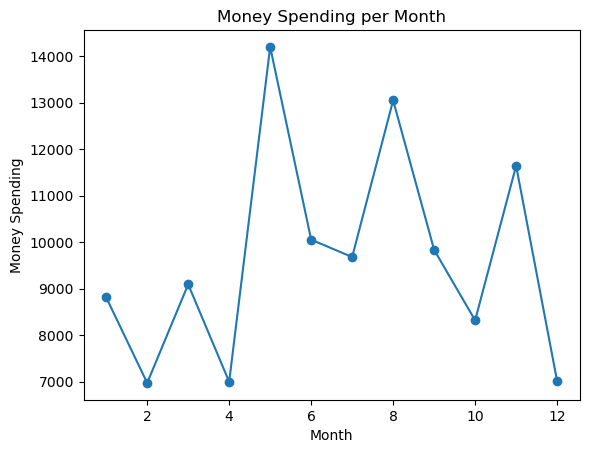

In [260]:
import pandas as pd
import matplotlib.pyplot as plt

data['Date'] = pd.to_datetime(data['Date'])

data['Month'] = df['Date'].dt.month

monthly_spending = df.groupby('Month')['OverallCost'].sum()

monthly_spending.plot(kind='line', marker='o')

plt.xlabel('Month')
plt.ylabel('Money Spending')
plt.title('Money Spending per Month')

plt.show()

In [149]:
import matplotlib.pyplot as plt

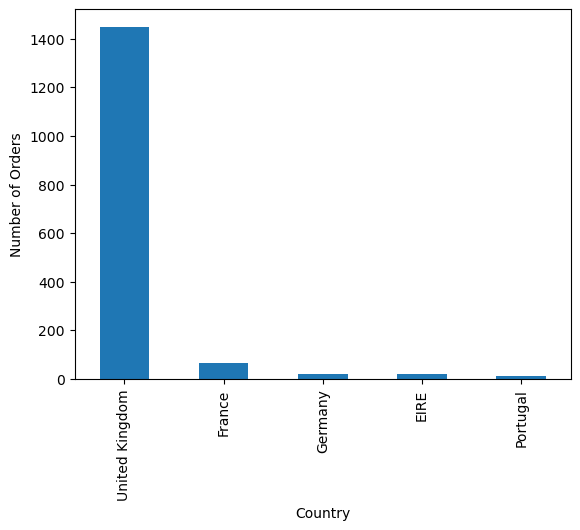

In [259]:
# plot the top 5 countries in terms of orders

country_orders = df['Country'].value_counts()

top_5_countries = country_orders.head(5)

top_5_countries.plot(kind='bar')

plt.xlabel('Country')
plt.ylabel('Number of Orders')

plt.show()